In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("netflix_titles.csv")
df.head(5)
df.isnull().sum()


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [5]:
df["listed_in"]=df["listed_in"].fillna("unknown")
df["director"]=df["director"].fillna("unknown")
df["rating"]=df["rating"].fillna("Not Rated")
df["cast"]=df["cast"].fillna("unknown")
df["country"]=df["country"].fillna("unknown")
df["duration"]=df["duration"].fillna("unknown")
df["date_added"]=df["date_added"].fillna(0)
df["date_added"]=pd.to_datetime(df["date_added"],errors="coerce")
df["year_added"]=df["date_added"].dt.year
df["year_added"]=df["year_added"].fillna(0)
df=df.dropna(subset=["date_added"])


In [6]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0
8803,s8804,TV Show,Zombie Dumb,unknown,unknown,unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0


In [8]:
#type counts
type_count=df["type"].value_counts()
print("MOVIES VS TV SHOWS :\n",)
type_count

MOVIES VS TV SHOWS :



,count
type,
Movie,6131
TV Show,2578


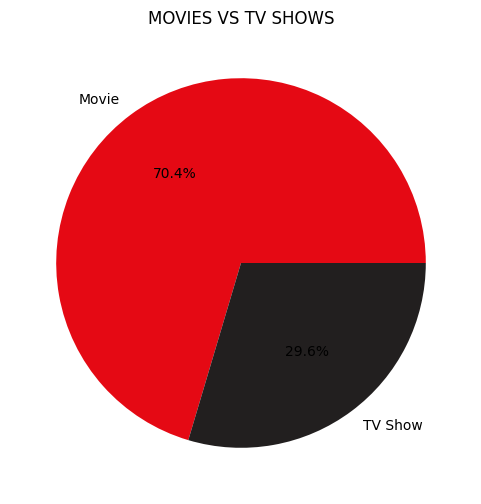

In [ ]:
#pie chart

plt.figure(figsize=(6,6))
plt.pie(type_count,
        labels=type_count.index,
        autopct="%1.1f%%",colors=["#e50914","#221f1f"])
plt.title("MOVIES VS TV SHOWS")
plt.show()

In [10]:
yearly_counts=df["year_added"].value_counts().sort_index()
yearly_counts.index.astype(int)


Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021],
      dtype='int64', name='year_added')

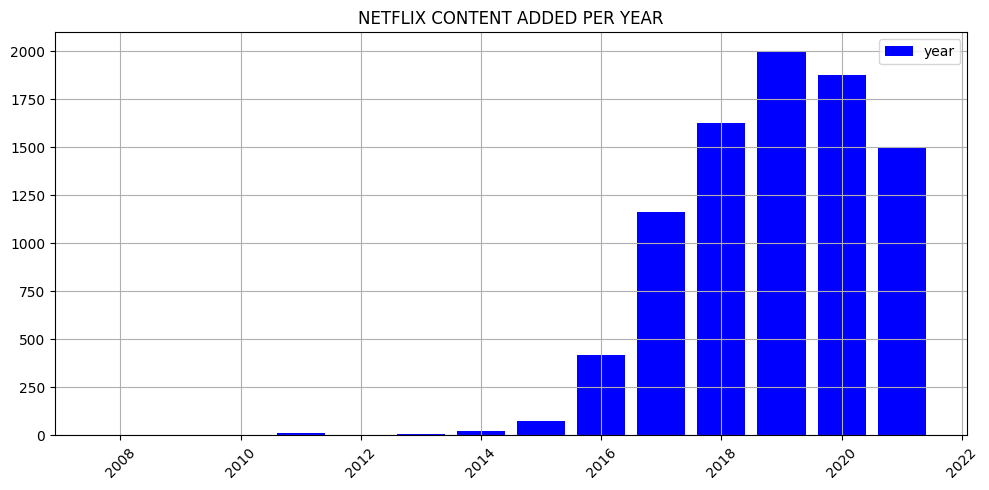

In [11]:
plt.figure(figsize=(10,5))
plt.bar(yearly_counts.index,
        yearly_counts.values,color="blue",
        label="year")
plt.title("NETFLIX CONTENT ADDED PER YEAR")
plt.yticks(np.arange(0,2100,250))
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.grid()
plt.show()


In [12]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0


In [27]:
country_count=df["country"].value_counts()
country_count_2=country_count.head()
country_count_2

,count
country,
United States,2778
India,971
unknown,827
United Kingdom,403
Japan,241


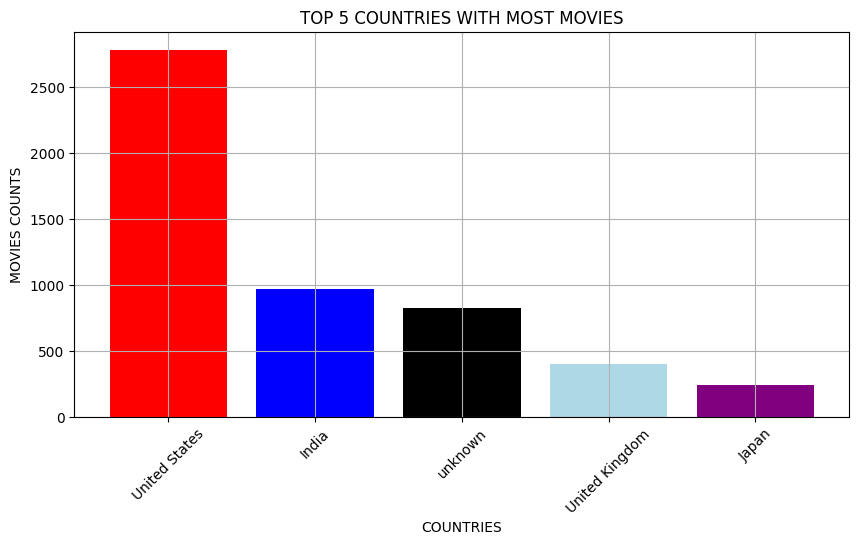

In [30]:
plt.figure(figsize=(10,5))
colors=["red","blue","black","lightblue","purple"]
plt.bar(country_count_2.index,country_count_2.values,color=colors)
plt.title("TOP 5 COUNTRIES WITH MOST MOVIES")
plt.xlabel("COUNTRIES")
plt.ylabel("MOVIES COUNTS")
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [31]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0


In [35]:
# Filter for movies from India
india_movies = df[(df['type'] == 'Movie') & (df['country'] == 'India')]

# Count movies per year for India
india_yearly_production = india_movies['year_added'].value_counts().sort_index()

# Print the yearly production counts
print("Movie Production in India Per Year:")
india_yearly_production



Movie Production in India Per Year:


,count
year_added,
2016.0,10
2017.0,128
2018.0,316
2019.0,187
2020.0,172
2021.0,80


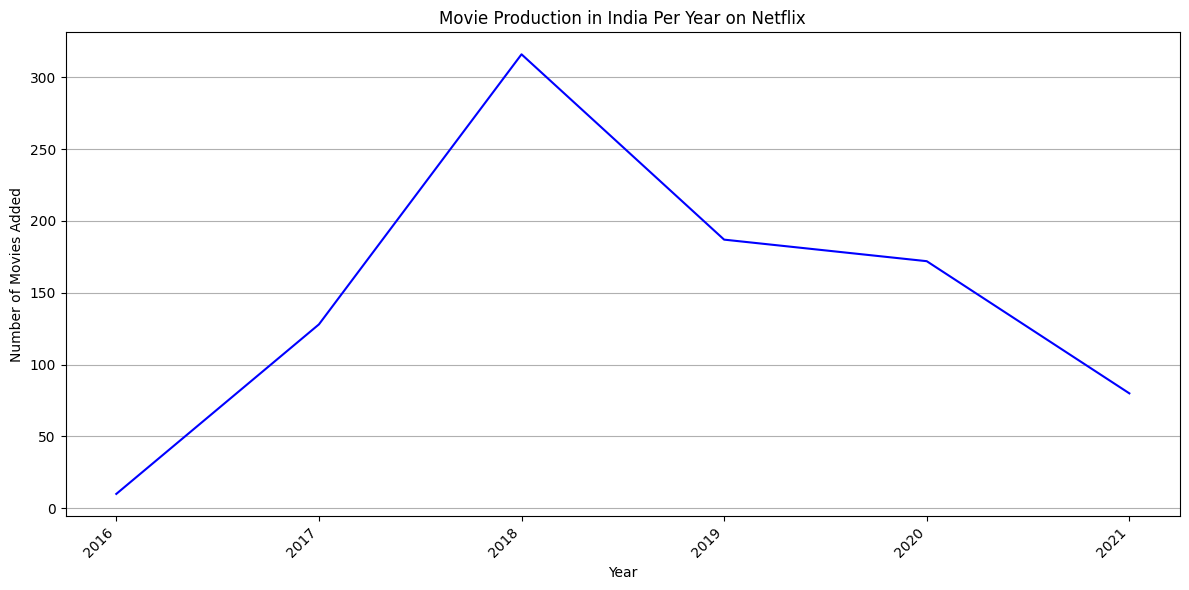

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(india_yearly_production.index, india_yearly_production.values, color='blue')
plt.title('Movie Production in India Per Year on Netflix')
plt.xlabel('Year')
plt.ylabel('Number of Movies Added')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [37]:
rating_counts = df['rating'].value_counts()
top_n_ratings = rating_counts.head(10)
top_n_ratings



,count
rating,
TV-MA,3183
TV-14,2133
TV-PG,838
R,799
PG-13,490
TV-Y7,330
TV-Y,300
PG,287
TV-G,212


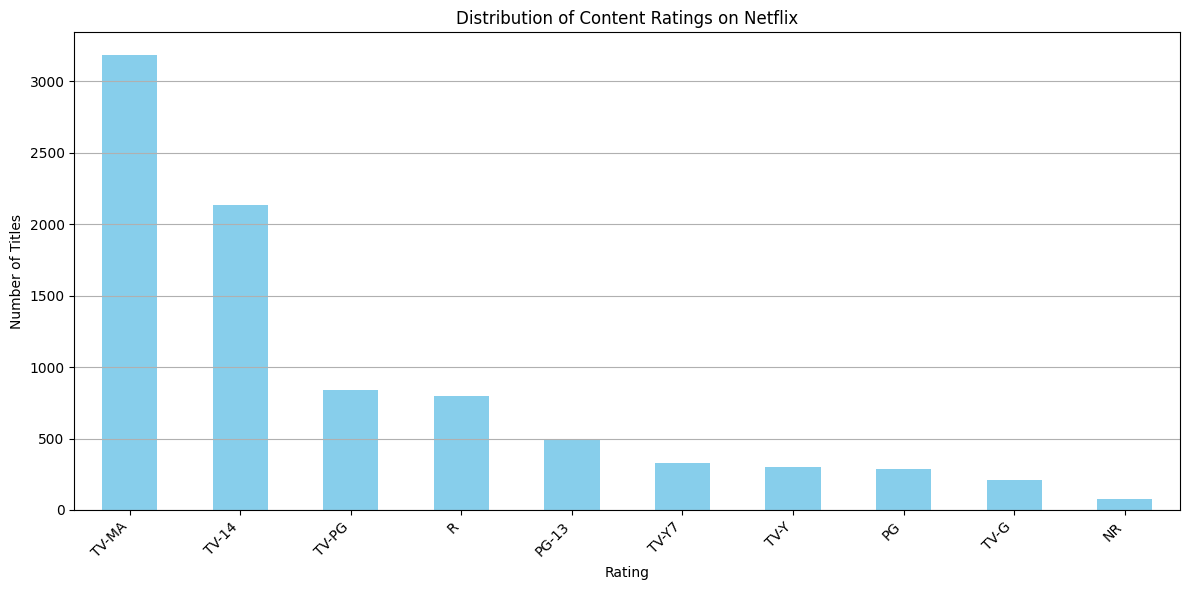

In [38]:
plt.figure(figsize=(12, 6))
top_n_ratings.plot(kind='bar', color='skyblue')
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [13]:
df.to_excel("netflix_titles_cleaned.xlsx",index=False)